In [70]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n

In [47]:
d = pd.read_csv('hiring.csv')
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [48]:
d.experience = d.experience.fillna("zero")

In [49]:
d.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [50]:
d.experience = d.experience.apply(w2n.word_to_num)
d

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [65]:
import math
median_test_score = math.floor(d['test_score(out of 10)'].mean())
median_test_score

7

In [52]:
d['test_score(out of 10)'] = d['test_score(out of 10)'].fillna(median_test_score)
d['test_score(out of 10)']

0     8.0
1     8.0
2     6.0
3    10.0
4     9.0
5     7.0
6     7.0
7     7.0
Name: test_score(out of 10), dtype: float64

In [54]:
model = linear_model.LinearRegression()
model.fit(d[['experience','test_score(out of 10)','interview_score(out of 10)']],d['salary($)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
model.predict([[10,8,9]])

array([81313.15749092])

In [58]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [60]:
reg.predict([[0,8,9]])

array([52090.46734071])

In [61]:
reg.coef_

array([2922.26901502, 2221.30909959, 2147.48256637])

In [62]:
reg.intercept_

14992.651446693118

In [63]:
2922.26901502*0+2221.30909959*8+2147.48256637*9+14992.651446693118


52090.46734074312

In [67]:
s = reg.predict([[12,10,10]])
s

array([93747.79628651])

Text(0, 0.5, 'Salary($)')

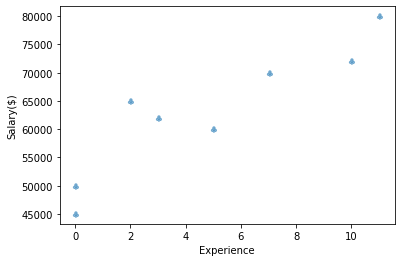

In [79]:
plt.scatter(d[['experience']],d['salary($)'],alpha=0.5,marker=r'$\clubsuit$',label="King")
plt.xlabel('Experience')
plt.ylabel('Salary($)')